<a href="https://colab.research.google.com/github/carvalheiracarlos/Speaker-Recognition-DIM0494/blob/main/train_stats_plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [3]:
url = 'https://raw.githubusercontent.com/carvalheiracarlos/Speaker-Recognition-DIM0494/main/callbacks/metrics.csv'
predictions_url = 'https://raw.githubusercontent.com/carvalheiracarlos/Speaker-Recognition-DIM0494/main/callbacks/predictions.csv'

In [4]:
metrics = pd.read_csv(url)
eval = pd.read_csv(predictions_url)

In [5]:
metrics.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
epoch,100.0,49.500000,29.011492,0.000000,24.750000,49.500000,74.250000,99.000000
categorical_accuracy,100.0,0.880438,0.148009,0.082989,0.885838,0.934627,0.948975,0.962565
loss,100.0,0.403029,0.595547,0.117137,0.161158,0.201749,0.346741,4.081843
val_categorical_accuracy,100.0,0.725213,0.137573,0.084088,0.699386,0.775226,0.803525,0.835705
val_loss,100.0,1.270255,0.652113,0.687355,0.887069,1.044010,1.327921,4.476337


In [16]:
eval.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1568.0,783.500000,452.786926,0.0,391.75,783.5,1175.25,1567.0
predictions,1568.0,45.616709,26.747426,0.0,22.00,46.0,70.00,89.0
true_labels,1568.0,45.179209,26.518066,0.0,22.00,46.0,68.00,89.0


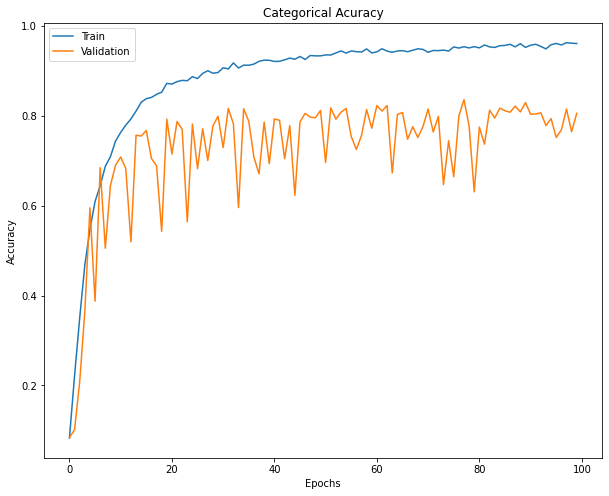

In [6]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = plt.plot(metrics['categorical_accuracy'], label='Train')
ax = plt.plot(metrics['val_categorical_accuracy'], label='Validation')
ax = plt.xlabel('Epochs')
ax = plt.ylabel('Accuracy')
ax = plt.title('Categorical Acuracy')
ax = plt.legend()

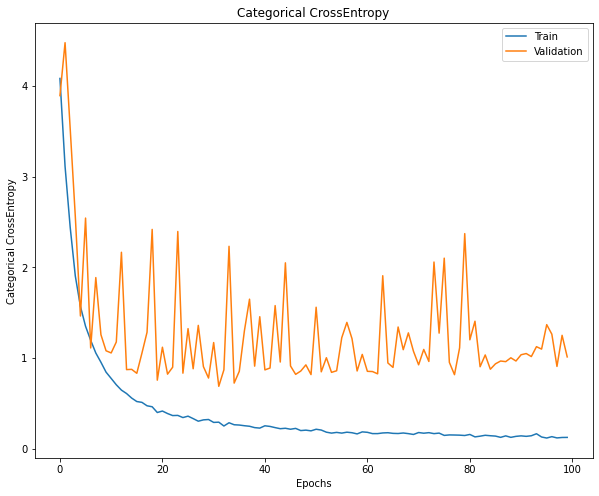

In [7]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = plt.plot(metrics['loss'], label='Train')
ax = plt.plot(metrics['val_loss'], label='Validation')
ax = plt.xlabel('Epochs')
ax = plt.ylabel('Categorical CrossEntropy')
ax = plt.title('Categorical CrossEntropy')
ax = plt.legend()

In [8]:
print(classification_report(eval.predictions, eval.true_labels))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90        35
           1       0.93      0.84      0.88        31
           2       0.80      1.00      0.89         4
           3       0.83      0.67      0.74        36
           4       0.40      1.00      0.57         6
           5       0.89      0.83      0.86        30
           6       0.87      0.93      0.90        29
           7       1.00      0.67      0.80         6
           9       0.57      0.65      0.60        20
          11       0.75      0.50      0.60        18
          12       1.00      0.82      0.90        22
          13       0.40      0.67      0.50         3
          14       0.33      1.00      0.50         3
          15       0.95      1.00      0.98        21
          16       0.90      1.00      0.95        26
          17       1.00      0.77      0.87        13
          18       0.79      0.58      0.67        26
          19       0.40    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
cm = confusion_matrix(eval.predictions, eval.true_labels)

Text(0.5, 1.0, 'Confusion Matrix')

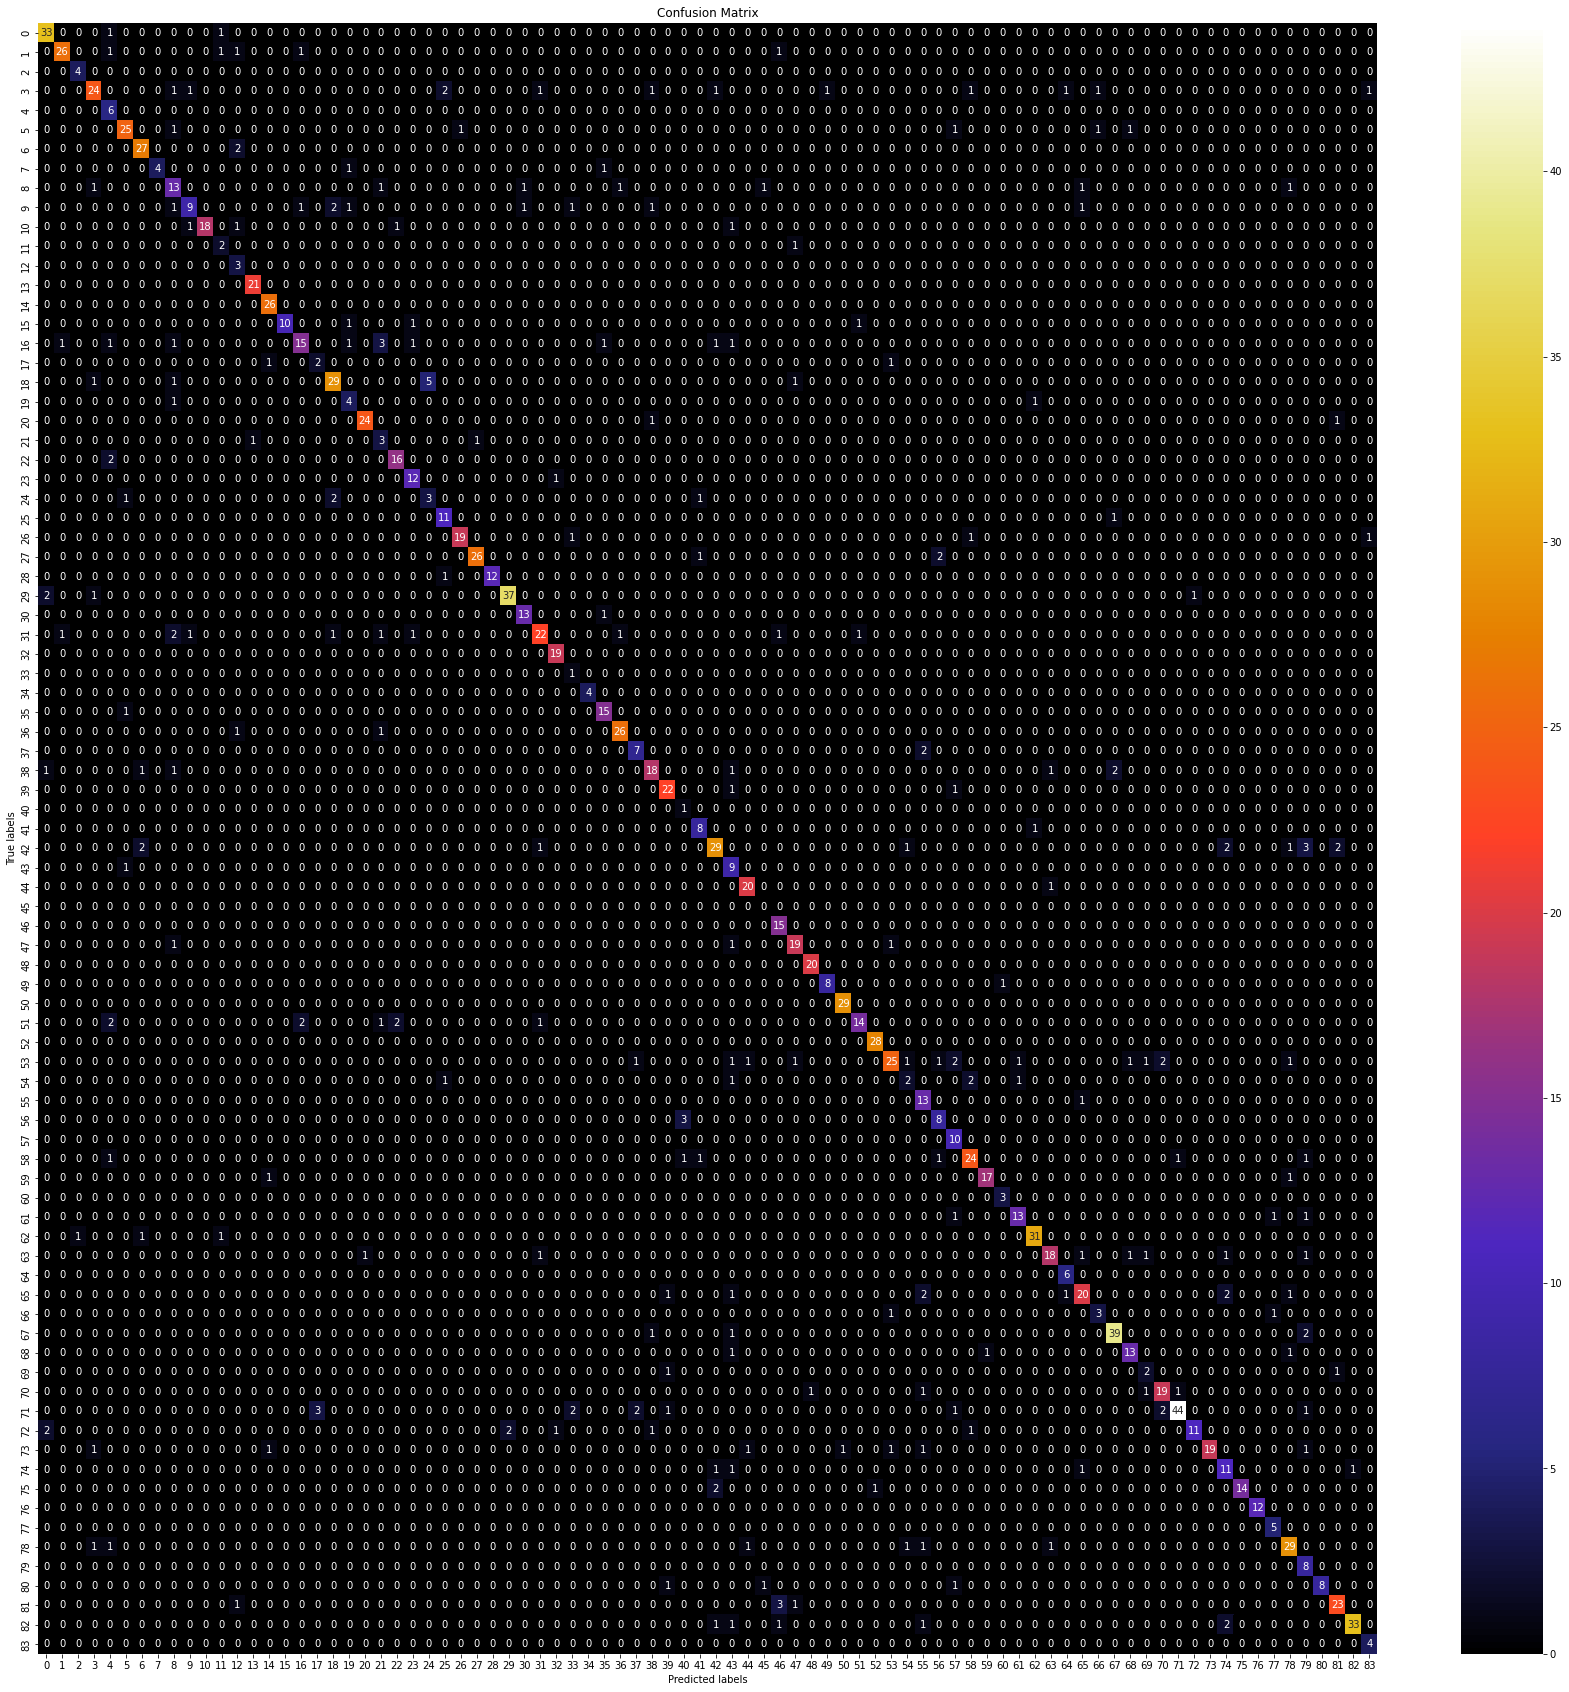

In [15]:
fig, ax = plt.subplots(figsize=(30, 30))
sns.heatmap(cm, annot=True, fmt='g', ax=ax, cmap='CMRmap')
ax.set_xlabel('Predicted labels') 
ax.set_ylabel('True labels') 
ax.set_title('Confusion Matrix')